# Tutorial 3: Compare cell-cell communication difference between the PDAC group and the normal group

CellFreeGMF employs graph matrix factorization to predict single-cell transcriptomic profiles of pathological and healthy groups by integrating cell-free transcriptome data with a pancreas single-cell reference dataset 

In [1]:
rm(list = ls())

print(R.home())
print(.libPaths())

[1] "/home/zhangwenxiang/anaconda3/envs/CellFreeGMF/lib/R"
[1] "/home/zhangwenxiang/anaconda3/envs/CellFreeGMF/lib/R/library"


## Preparation

In [2]:
library(reticulate)
library(Seurat)
library(dplyr)
library(future)

Attaching SeuratObject

Warning message:
“程辑包‘dplyr’是用R版本4.2.3 来建造的”

载入程辑包：‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Setting python environment

In [3]:
use_python("/home/zhangwenxiang/anaconda3/envs/CellFreeGMF/bin/python", required = TRUE)

py_config()

python:         /home/zhangwenxiang/anaconda3/envs/CellFreeGMF/bin/python
libpython:      /home/zhangwenxiang/anaconda3/envs/CellFreeGMF/lib/libpython3.10.so
pythonhome:     /home/zhangwenxiang/anaconda3/envs/CellFreeGMF:/home/zhangwenxiang/anaconda3/envs/CellFreeGMF
version:        3.10.16 | packaged by conda-forge | (main, Apr  8 2025, 20:53:32) [GCC 13.3.0]
numpy:          /home/zhangwenxiang/anaconda3/envs/CellFreeGMF/lib/python3.10/site-packages/numpy
numpy_version:  2.2.6

NOTE: Python version was forced by use_python() function

## Hyperparameter Configuration

In [4]:
setwd('/home/zhangwenxiang/workspace/python/cfRNA/v16')
disease_name = 'PDAC'

## Load predicted sample-specific single-cell transcriptomic

In [5]:
np <- import("numpy")

Decon_sampletype_disease_cfRNAtype_Target_gene <- np$load(paste("./save_data/", disease_name, "/Decon_sampletype_disease_cfRNAtype_Target_gene.npz", sep = ""), allow_pickle = TRUE)
Decon_sampletype_normal_cfRNAtype_Target_gene <- np$load(paste("./save_data/", disease_name, "/Decon_sampletype_normal_cfRNAtype_Target_gene.npz", sep = ""), allow_pickle = TRUE)

Normal_Target_decon_Result_sample_cfRNA <- py_to_r(Decon_sampletype_normal_cfRNAtype_Target_gene$f['Result_sample_cfRNA'])
Normal_Target_decon_Result_sample_cell <- py_to_r(Decon_sampletype_normal_cfRNAtype_Target_gene$f['Result_sample_cell'])
Normal_Target_decon_Result_cfRNA_cell <- py_to_r(Decon_sampletype_normal_cfRNAtype_Target_gene$f['Result_cfRNA_cell'])
Normal_Target_decon_sample_name <- py_to_r(Decon_sampletype_normal_cfRNAtype_Target_gene$f['sample_name'])
Normal_Target_decon_cfRNA_name <- py_to_r(Decon_sampletype_normal_cfRNAtype_Target_gene$f['cfRNA_name'])
Normal_Target_decon_cell_name <- py_to_r(Decon_sampletype_normal_cfRNAtype_Target_gene$f['cell_name_cell_ontology_class'])
Normal_Target_decon_cell_id <- py_to_r(Decon_sampletype_normal_cfRNAtype_Target_gene$f['cell_id'])
Normal_Target_cell_meta <- data.frame(cell_name = Normal_Target_decon_cell_name,
                                      cell_id = Normal_Target_decon_cell_id)

Disease_Target_decon_Result_sample_cfRNA <- py_to_r(Decon_sampletype_disease_cfRNAtype_Target_gene$f['Result_sample_cfRNA'])
Disease_Target_decon_Result_sample_cell <- py_to_r(Decon_sampletype_disease_cfRNAtype_Target_gene$f['Result_sample_cell'])
Disease_Target_decon_Result_cfRNA_cell <- py_to_r(Decon_sampletype_disease_cfRNAtype_Target_gene$f['Result_cfRNA_cell'])
Disease_Target_decon_sample_name <- py_to_r(Decon_sampletype_disease_cfRNAtype_Target_gene$f['sample_name'])
Disease_Target_decon_cfRNA_name <- py_to_r(Decon_sampletype_disease_cfRNAtype_Target_gene$f['cfRNA_name'])
Disease_Target_decon_cell_name <- py_to_r(Decon_sampletype_disease_cfRNAtype_Target_gene$f['cell_name_cell_ontology_class'])
Disease_Target_decon_cell_id <- py_to_r(Decon_sampletype_disease_cfRNAtype_Target_gene$f['cell_id'])
Disease_Target_cell_meta <- data.frame(cell_name = Disease_Target_decon_cell_name,
                                      cell_id = Disease_Target_decon_cell_id)

## Cell-Cell communications

In [6]:
library(CellChat)
library(org.Hs.eg.db)

载入需要的程辑包：igraph

Warning message:
“程辑包‘igraph’是用R版本4.2.1 来建造的”

载入程辑包：‘igraph’


The following objects are masked from ‘package:future’:

    %->%, %<-%


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


载入需要的程辑包：ggplot2

载入需要的程辑包：AnnotationDbi

Warning message:
“程辑包‘AnnotationDbi’是用R版本4.2.2 来建造的”
载入需要的程辑包：stats4

载入需要的程辑包：IRanges

Warning message:
“程辑包‘IRanges’是用R版本4.2.3 来建造的”
载入需要的程辑包：S4Vectors

Warning message:
“程辑包‘S4Vectors’是用R版本4.2.3 来建造的”

载入程辑包：‘S4Vectors’


The following objects are masked from ‘package:dplyr’:

    first, rename


The following objects are masked from ‘package:base’:

    expand.grid, I, unname



载入程辑包：‘IRanges’


The following objects are masked from ‘package:dplyr’:

    collapse, desc, slice



载入程辑包：‘AnnotationDbi’


The following object is masked from ‘package:dplyr’:

Extract PDAC sample single-cell transcriptomic and normal sample single-cell transcriptomic

In [7]:
library(CellChat)
library(org.Hs.eg.db)  # 人类示例

disease_mat <- data.frame(Disease_Target_decon_Result_cfRNA_cell)
rownames(disease_mat) <- Disease_Target_decon_cfRNA_name
colnames(disease_mat) <- paste(Disease_Target_decon_cell_id, '1', sep = "_")

gene_symbols <- mapIds(org.Hs.eg.db, 
                       keys = rownames(disease_mat),
                       keytype = "ENSEMBL", 
                       column = "SYMBOL")
gene_symbols_no_na <- gene_symbols[!is.na(gene_symbols)]
gene_symbols_no_na <- gene_symbols_no_na[!duplicated(gene_symbols_no_na)]
disease_mat <- disease_mat[names(gene_symbols_no_na),]
rownames(disease_mat) <- gene_symbols_no_na


normal_mat <- data.frame(Normal_Target_decon_Result_cfRNA_cell)
rownames(normal_mat) <- Normal_Target_decon_cfRNA_name
colnames(normal_mat) <- paste(Normal_Target_decon_cell_id, '0', sep = "_")

gene_symbols <- mapIds(org.Hs.eg.db, 
                       keys = rownames(normal_mat),
                       keytype = "ENSEMBL", 
                       column = "SYMBOL")
gene_symbols_no_na <- gene_symbols[!is.na(gene_symbols)]
gene_symbols_no_na <- gene_symbols_no_na[!duplicated(gene_symbols_no_na)]
normal_mat <- normal_mat[names(gene_symbols_no_na),]
rownames(normal_mat) <- gene_symbols_no_na

disease_meta_data <- data.frame(
  cell_id = colnames(disease_mat),
  cell_type = Disease_Target_decon_cell_name,
  group = 'Disease'
)
rownames(disease_meta_data) <- disease_meta_data$cell_id

normal_meta_data <- data.frame(
  cell_id = colnames(normal_mat),
  cell_type = Normal_Target_decon_cell_name,
  group = 'Normal'
)
rownames(normal_meta_data) <- normal_meta_data$cell_id

'select()' returned 1:many mapping between keys and columns

'select()' returned 1:many mapping between keys and columns



Create a Seurat object

In [8]:
# Seurat object for predicted PDAC sample single-cell transcriptomic
sc.disease <- CreateSeuratObject(
  counts = disease_mat,
  meta.data = disease_meta_data
)

# Seurat object for predicted normal sample single-cell transcriptomic
sc.normal <- CreateSeuratObject(
  counts = normal_mat,
  meta.data = normal_meta_data
)

Legend: CellChat was applied to construct and analyze cell–cell communication networks in disease and normal groups, generating cc.scdisease and cc.scnormal objects for downstream comparison.

In [9]:
cellchat.scdisease <- createCellChat(object =sc.disease@assays$RNA@data, meta =sc.disease@meta.data,  group.by ="cell_type")
cellchat.scnormal <- createCellChat(object =sc.normal@assays$RNA@data, meta =sc.normal@meta.data,  group.by ="cell_type")

dir.create(paste0('save_data/', disease_name, '/cellchat/', seq=""))

options(future.globals.maxSize = 1200 * 1024^2)  # 1000 MB

cellchat=cellchat.scdisease
CellChatDB <- CellChatDB.human
cellchat@DB  <- subsetDB(CellChatDB, search = "Secreted Signaling") # use Secreted Signaling
cellchat <- subsetData(cellchat, features = rownames(sc.disease@assays$RNA@counts))
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)
cellchat <- projectData(cellchat, PPI.human)
cellchat <- computeCommunProb(cellchat, raw.use = TRUE,population.size =T)
cellchat <- filterCommunication(cellchat, min.cells = 3)
cellchat <- computeCommunProbPathway(cellchat)
cellchat <- aggregateNet(cellchat)
cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP")
cc.scdisease = cellchat
save(cc.scdisease, file = paste0('./save_data/', disease_name, '/cellchat/cc.scdisease.RData', seq=""))
#################################
cellchat=cellchat.scnormal
cellchat@DB  <- subsetDB(CellChatDB, search = "Secreted Signaling") # use Secreted Signaling
cellchat <- subsetData(cellchat, features = rownames(sc.normal@assays$RNA@counts))
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)
cellchat <- projectData(cellchat, PPI.human)
cellchat <- computeCommunProb(cellchat, raw.use = TRUE,population.size =T)
cellchat <- filterCommunication(cellchat, min.cells = 3)
cellchat <- computeCommunProbPathway(cellchat)
cellchat <- aggregateNet(cellchat)
cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP")
cc.scnormal = cellchat
save(cc.scnormal, file = paste0('./save_data/', disease_name, '/cellchat/cc.scnormal.RData', seq=""))

print('done')
load(paste0('./save_data/', disease_name, '/cellchat/cc.scdisease.RData', seq=""))
load(paste0('./save_data/', disease_name, '/cellchat/cc.scnormal.RData', seq=""))

cc.list=list(scdisease=cc.scdisease,scnormal=cc.scnormal)
cellchat=mergeCellChat(cc.list,cell.prefix = T,add.names = names(cc.list))

[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  b cell endothelial cell fibroblast mast cell myeloid cell nk cell pancreatic acinar cell pancreatic alpha cell pancreatic beta cell pancreatic delta cell pancreatic ductal cell pancreatic pp cell pancreatic stellate cell plasma cell t cell 
[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  b cell endothelial cell fibroblast mast cell myeloid cell nk cell pancreatic acinar cell pancreatic alpha cell pancreatic beta cell pancreatic delta cell pancreatic ductal cell pancreatic pp cell pancreatic stellate cell plasma cell t cell 
triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2025-08-28 19:50:14]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@o

Warning message in mergeCellChat(cc.list, cell.prefix = T, add.names = names(cc.list)):
“Prefix cell names!”


The cell barcodes in merged 'meta' is  AAACCCACAGCTATTG_TSP9_Pancreas_exocrine_10X_1_1_CellCountLive_1 AAACCCAGTCGTATGT_TSP9_Pancreas_exocrine_10X_1_1_CellCountLive_1 AAACCCAGTCTGGTTA_TSP9_Pancreas_exocrine_10X_1_1_CellCountLive_1 AAACCCATCAAGCCGC_TSP9_Pancreas_exocrine_10X_1_1_CellCountLive_1 AAACCCATCGGCATAT_TSP9_Pancreas_exocrine_10X_1_1_CellCountLive_1 AAACGAACAATAACGA_TSP9_Pancreas_exocrine_10X_1_1_CellCountLive_1 


Warning message in mergeCellChat(cc.list, cell.prefix = T, add.names = names(cc.list)):
“The cell barcodes in merged 'meta' is different from those in the used data matrix.
              We now simply assign the colnames in the data matrix to the rownames of merged 'mata'!”
Merge the following slots: 'data.signaling','images','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



### Comparison of cell–cell interaction strengths between PDAC and normal group based on communication weight.

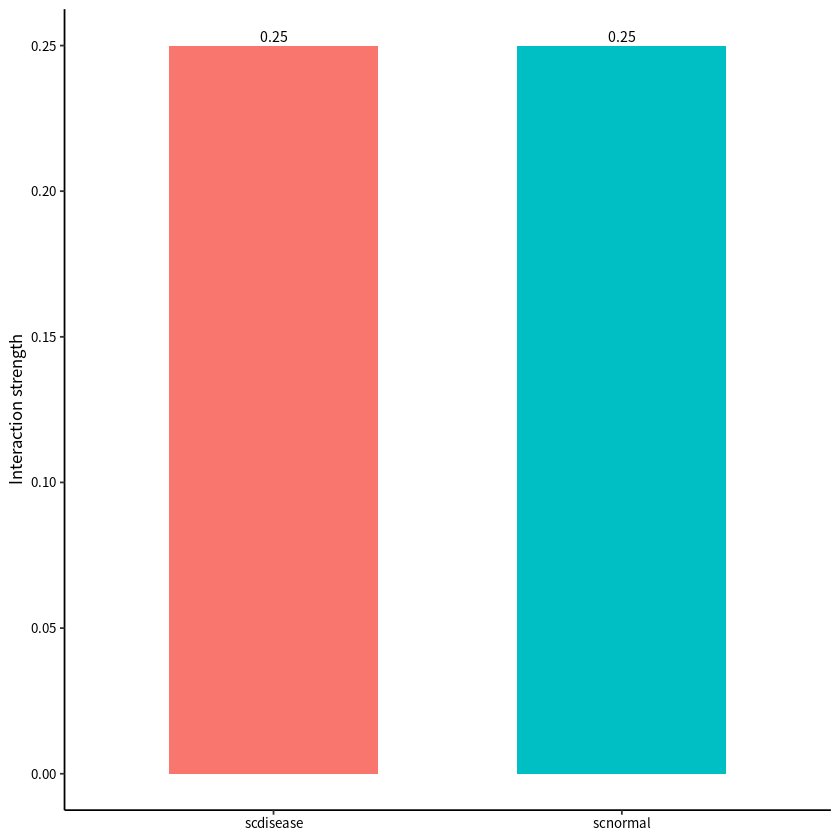

In [10]:
compareInteractions(cellchat,show.legend = F,group = c(1,2),measure = "weight")

### Differential intercellular communication network showing the scaled differences in interaction strength between PDAC and normal group

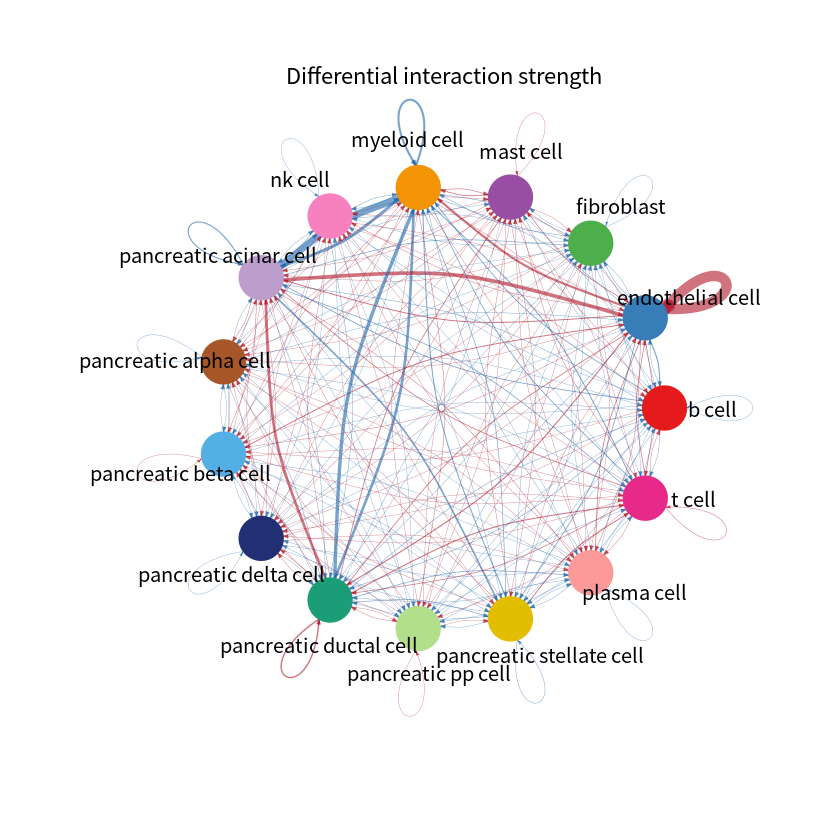

In [11]:
p1 <- netVisual_diffInteraction(cellchat,weight.scale = T,measure = "weight")

### Heatmap illustrating the differential strength of cell–cell communication interactions between PDAC and normal group, measured by signaling weight.

Do heatmap based on a merged object 




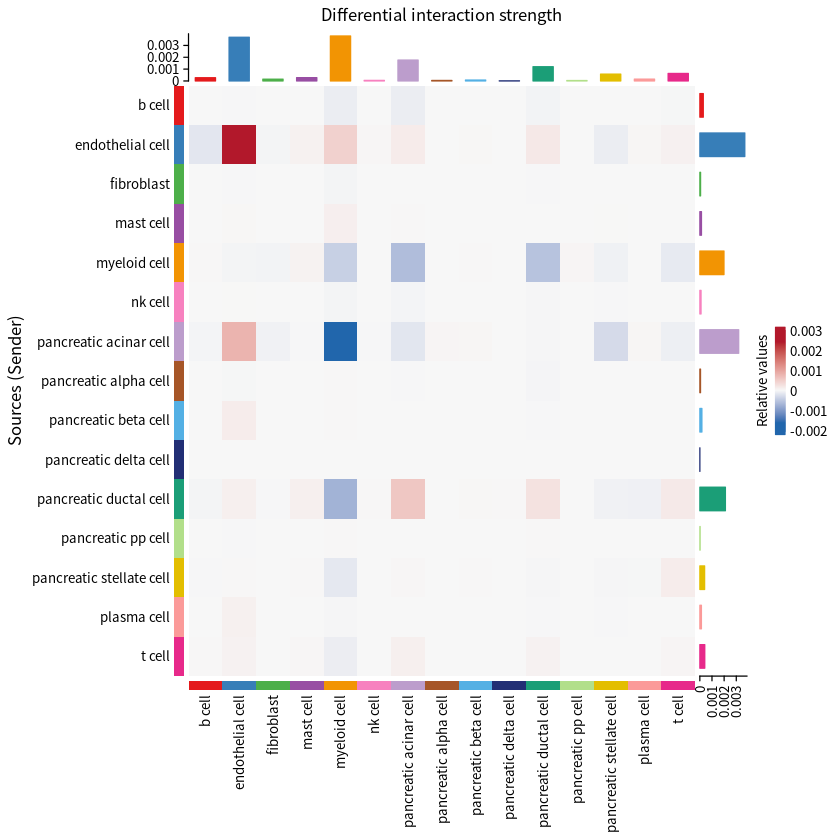

In [12]:
p2 <- netVisual_heatmap(cellchat,measure = "weight")
p2

### Significant signaling pathways were ranked based on differences in the overall information flow within the inferred networks between two datasets. 

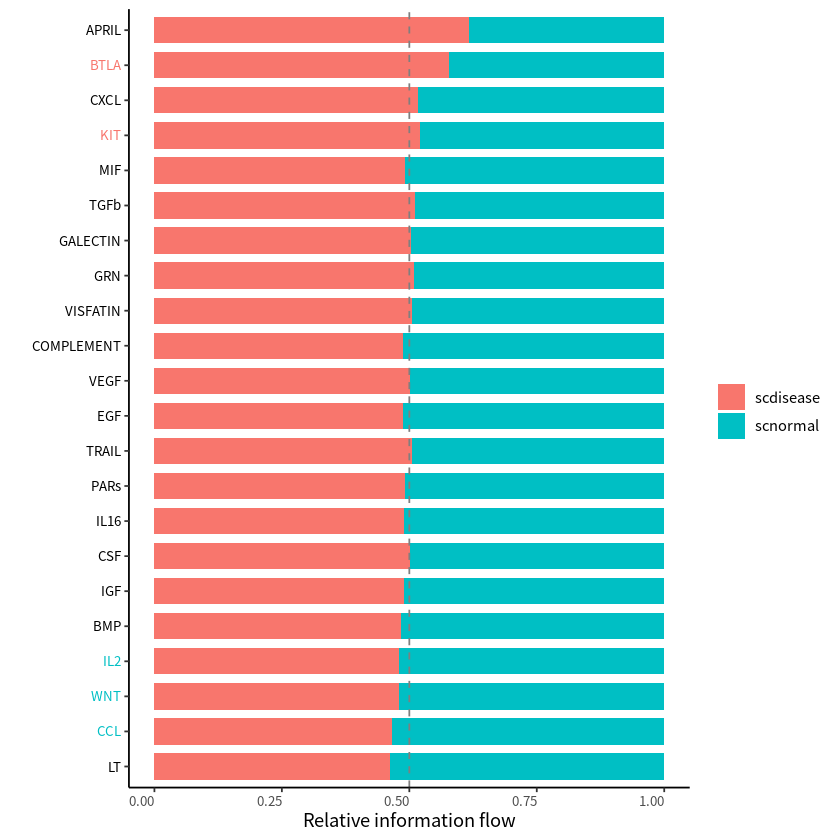

In [13]:
rankNet(cellchat,mode = "comparison",stacked = T,do.stat = T)

### Bubble plots showing significantly difference interactions in the PDAC group compared with the normal group

Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 




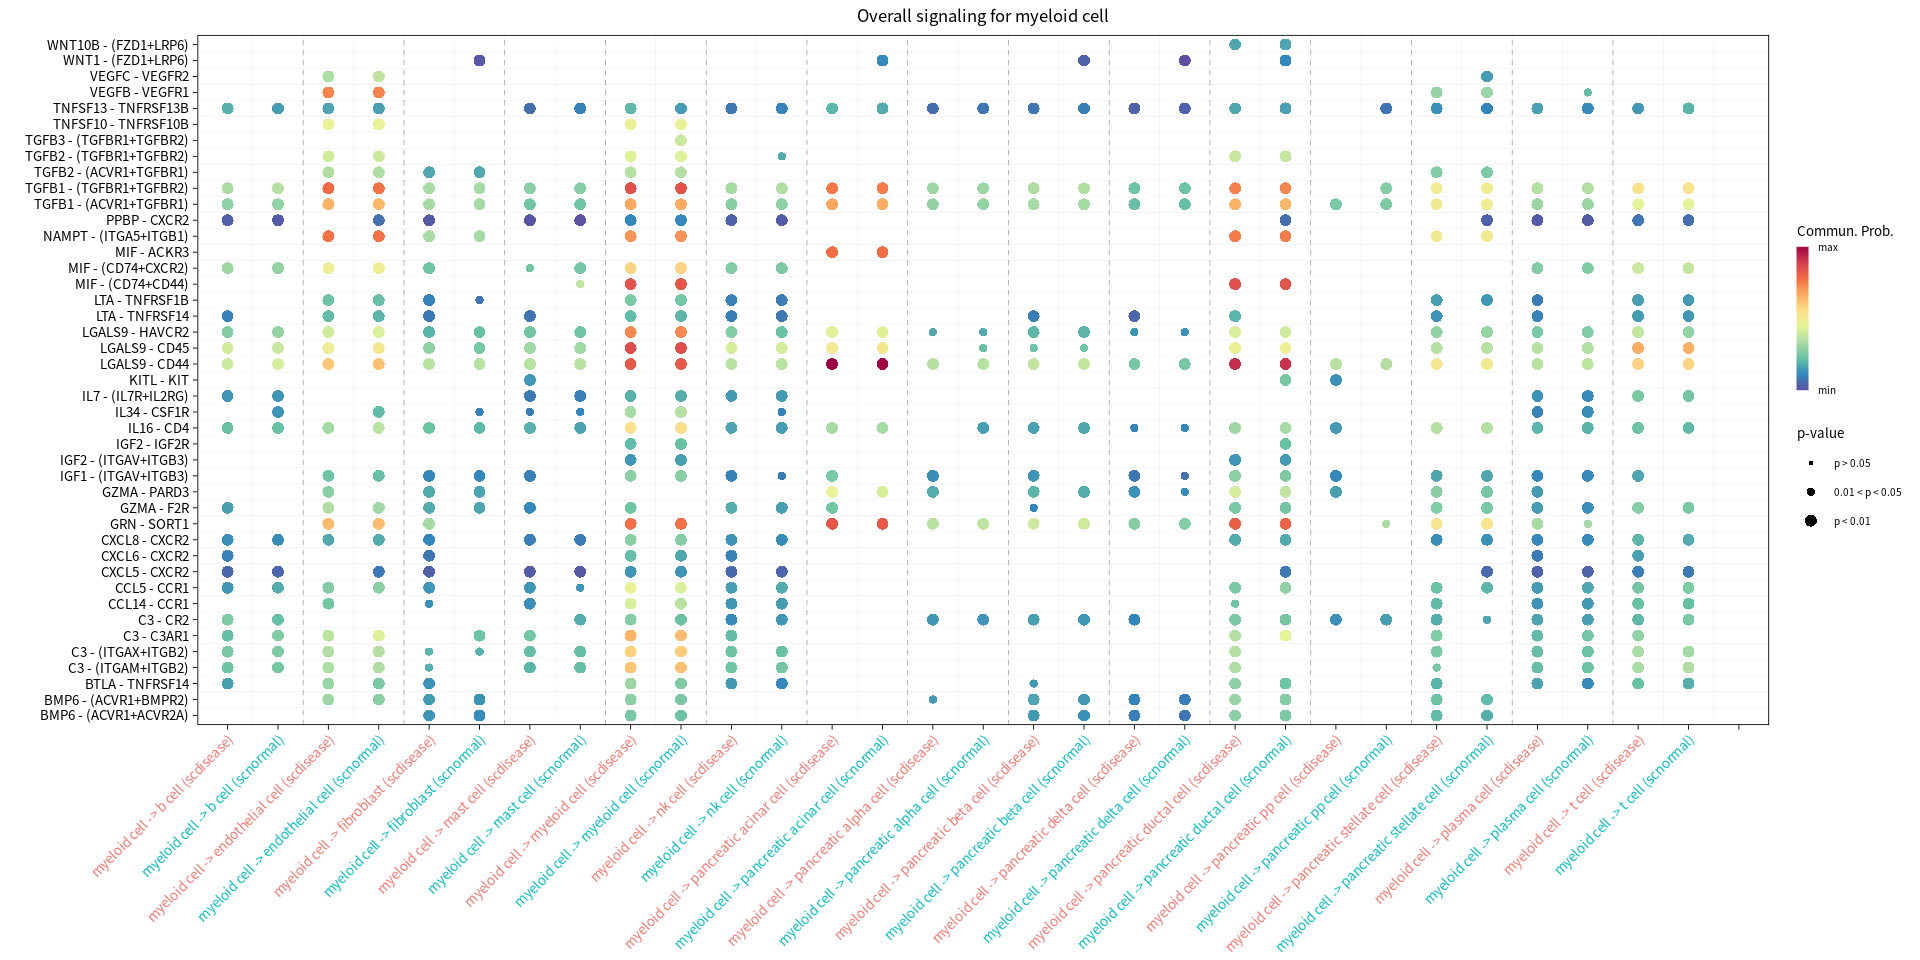

Comparing communications on a merged object 




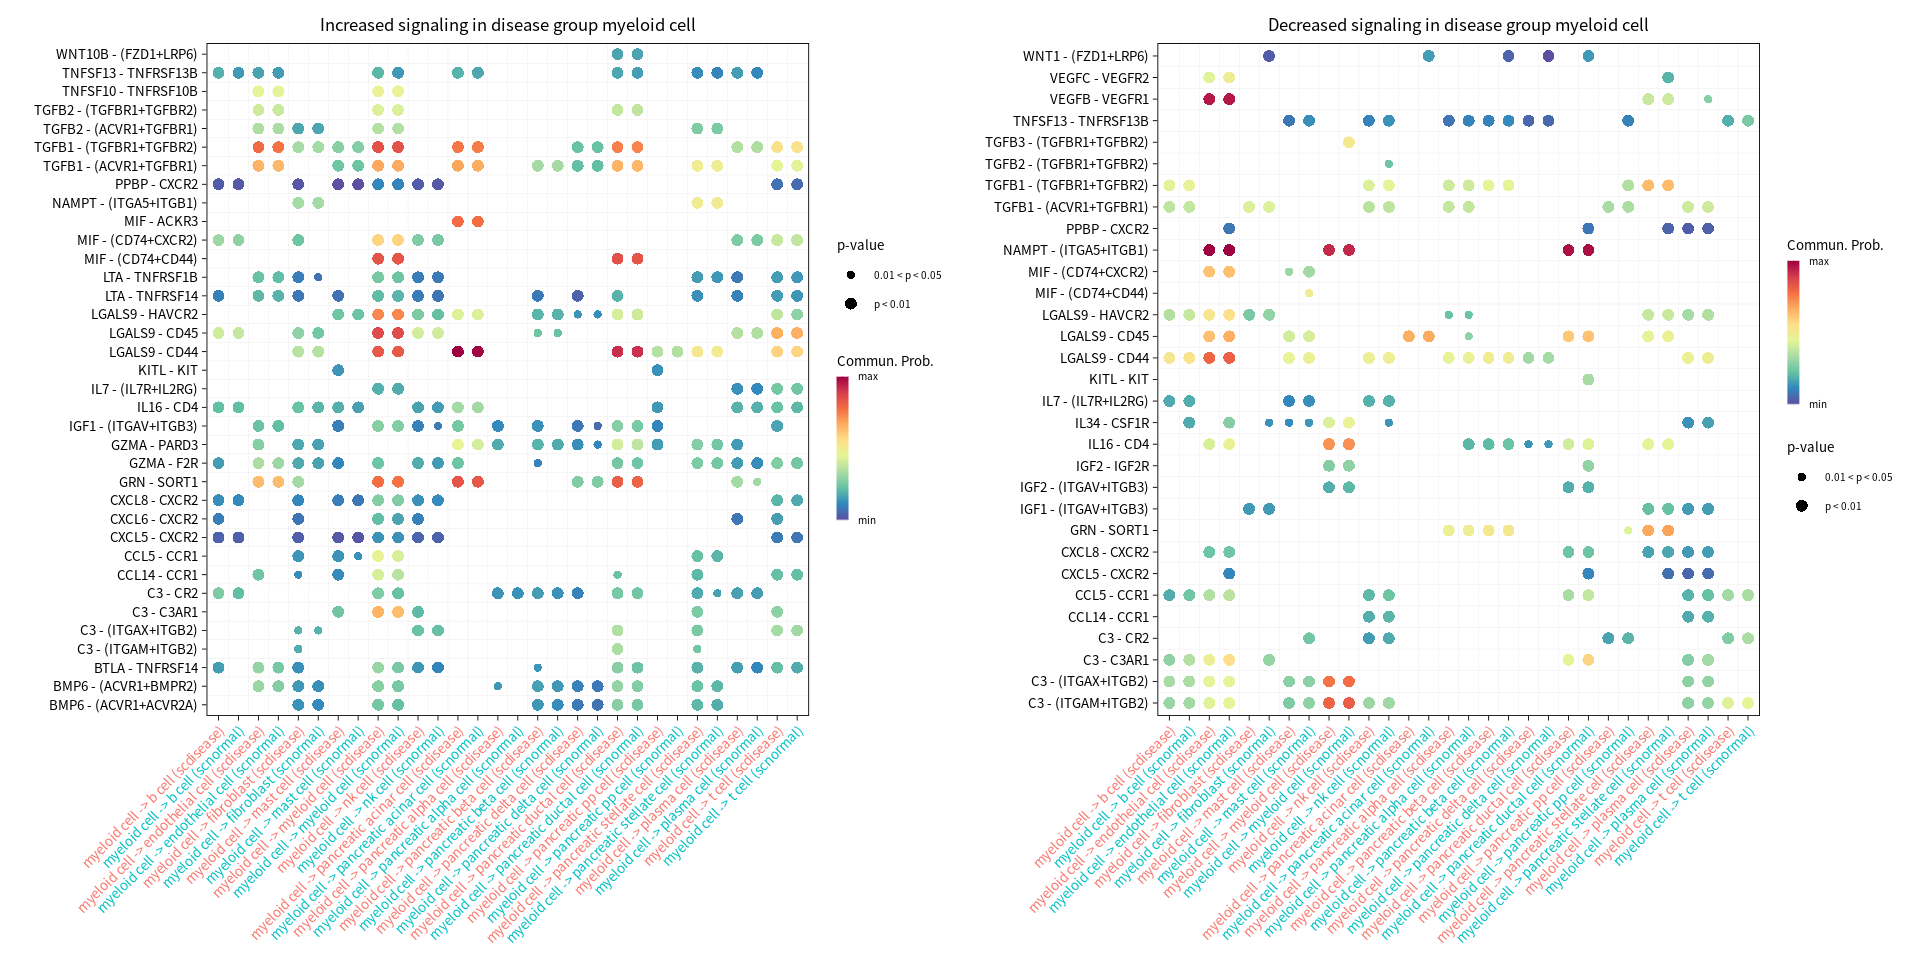

Comparing communications on a merged object 


Comparing communications on a merged object 




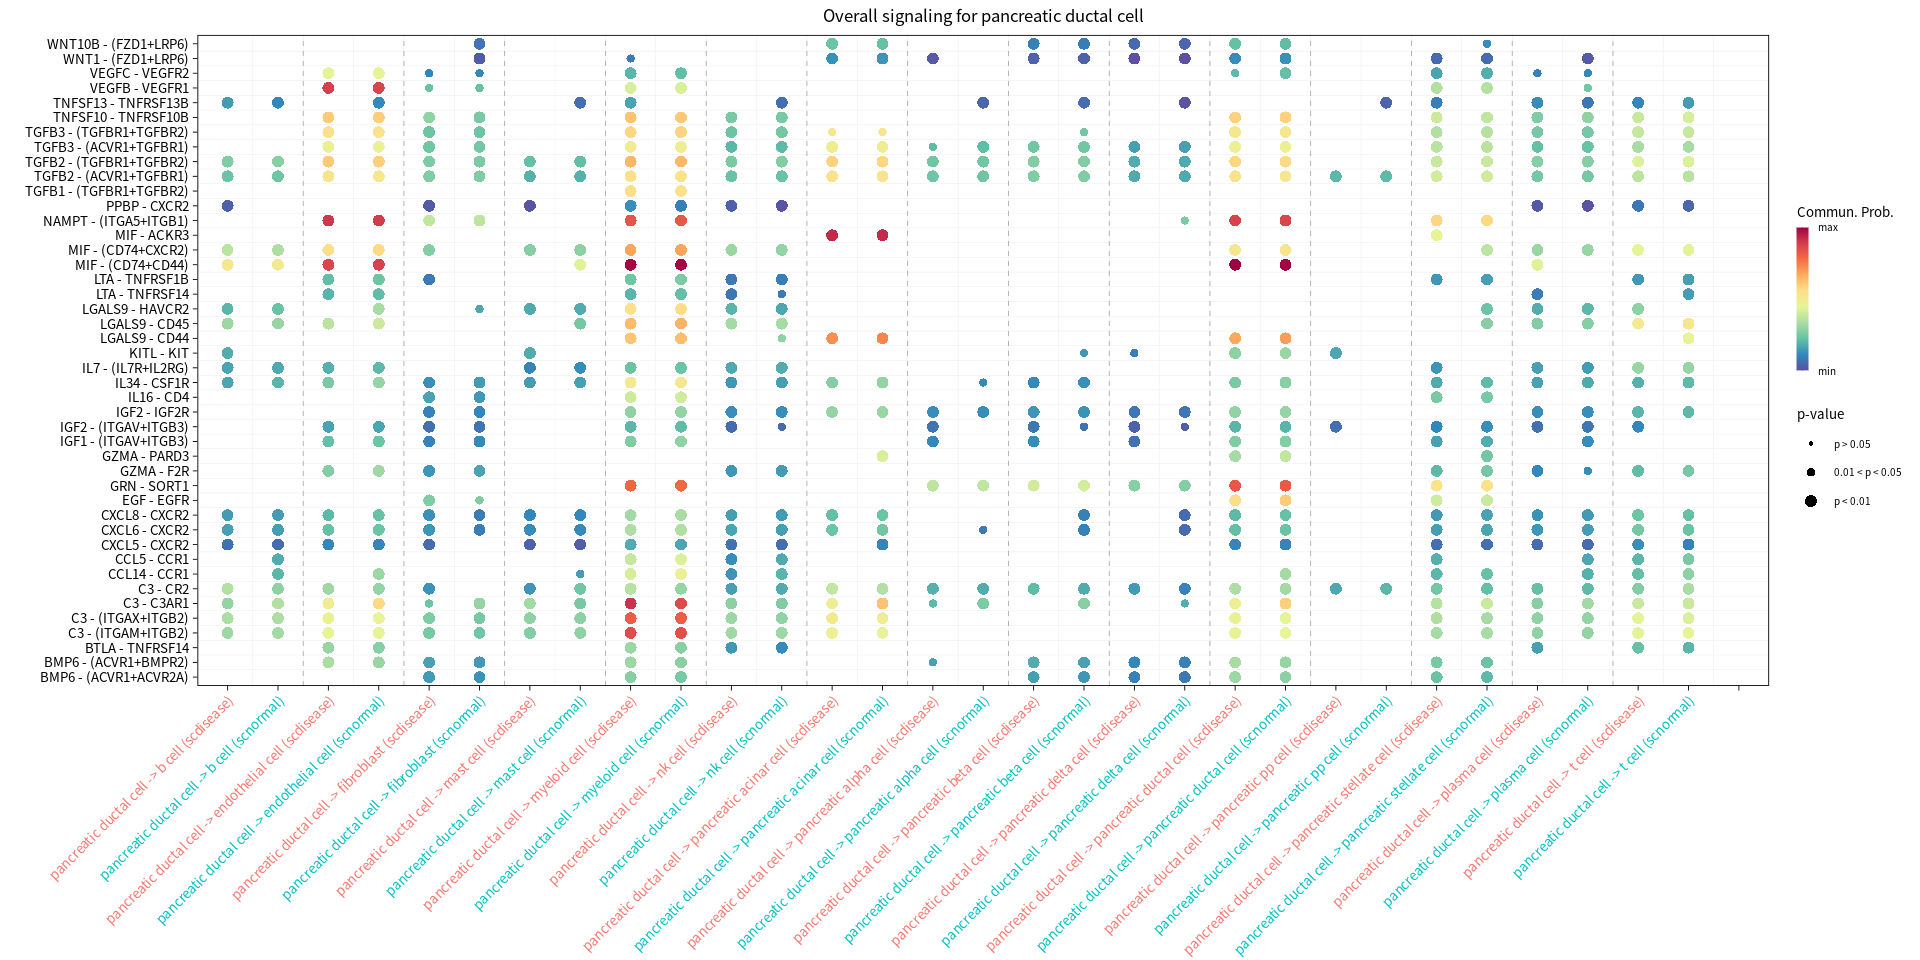

Comparing communications on a merged object 




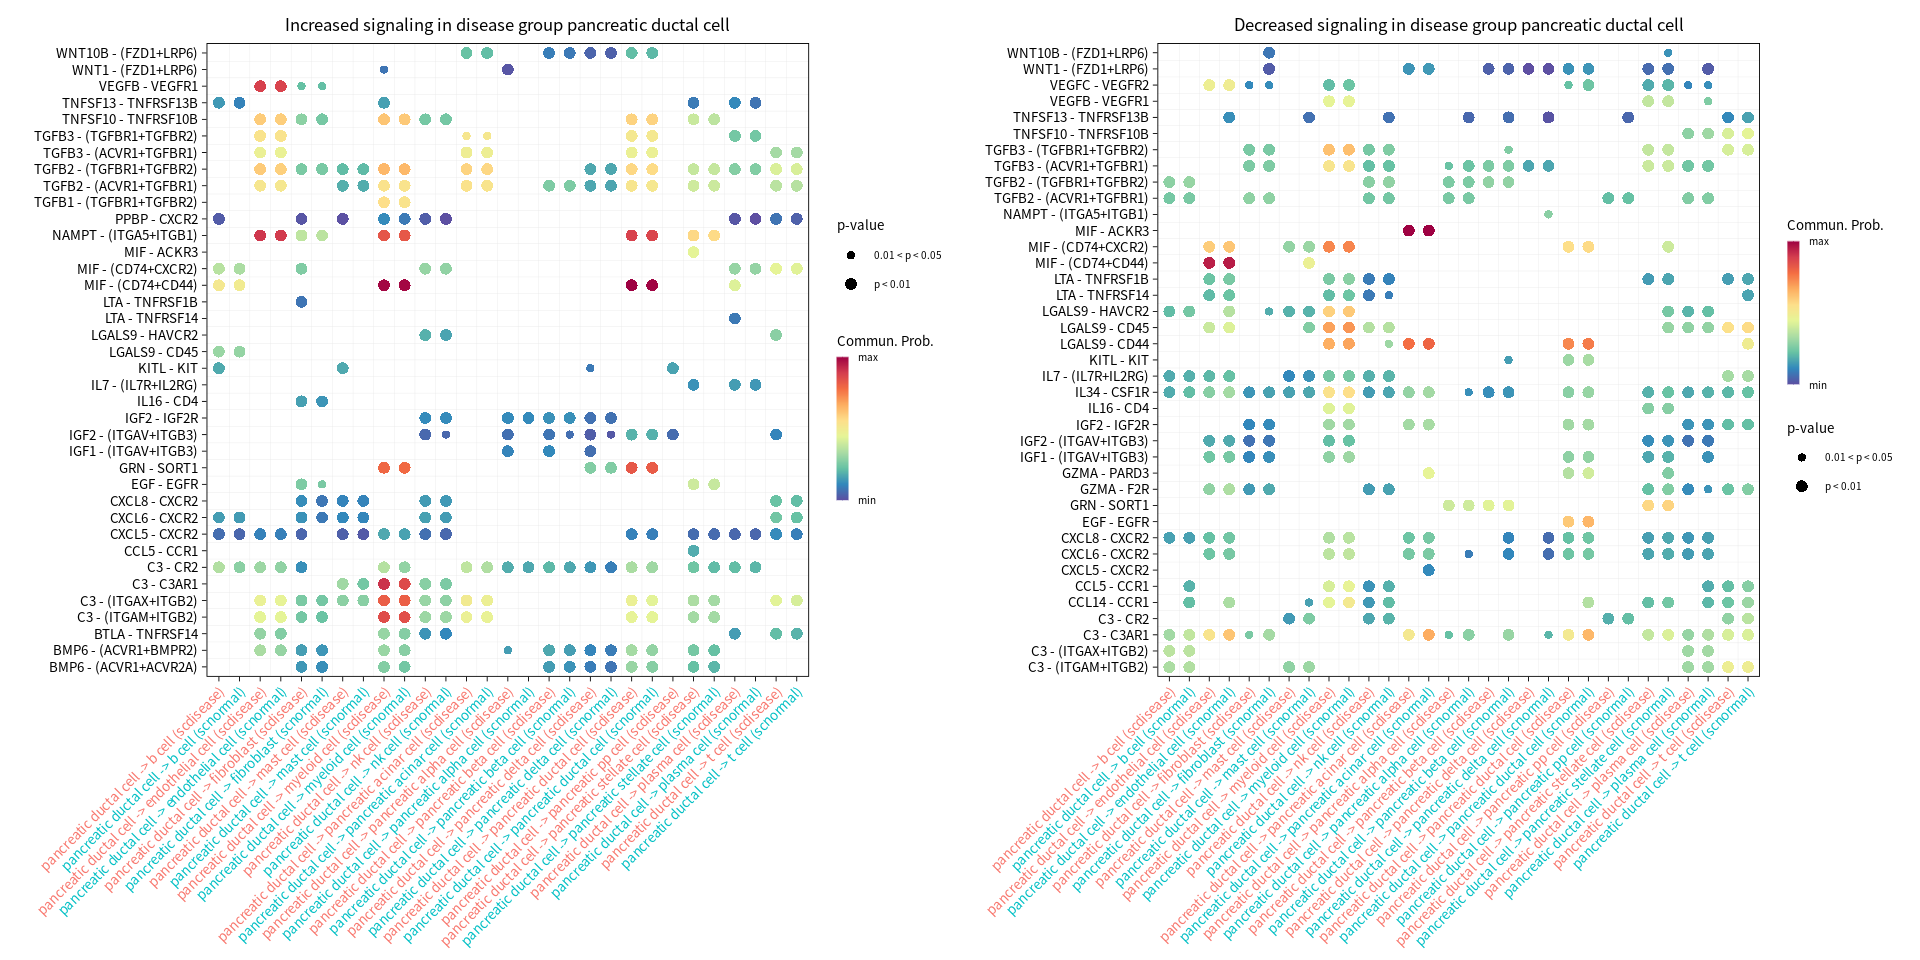

Comparing communications on a merged object 


Comparing communications on a merged object 




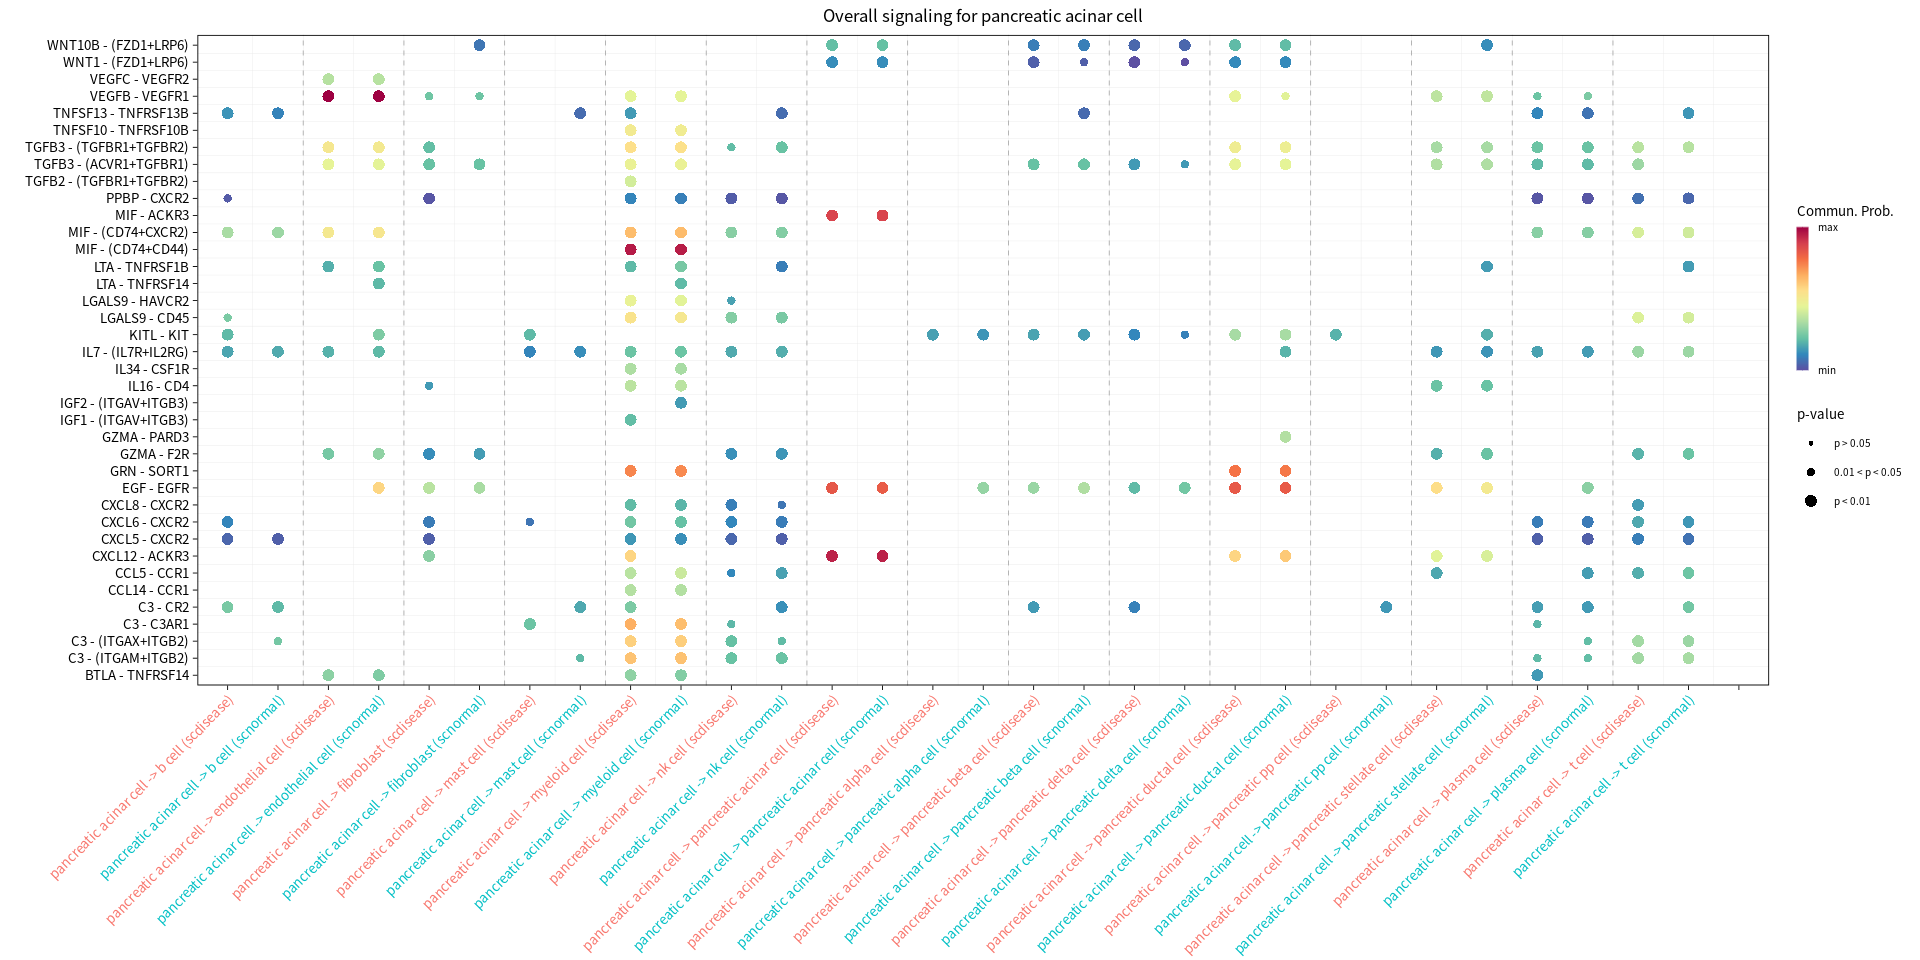

Comparing communications on a merged object 




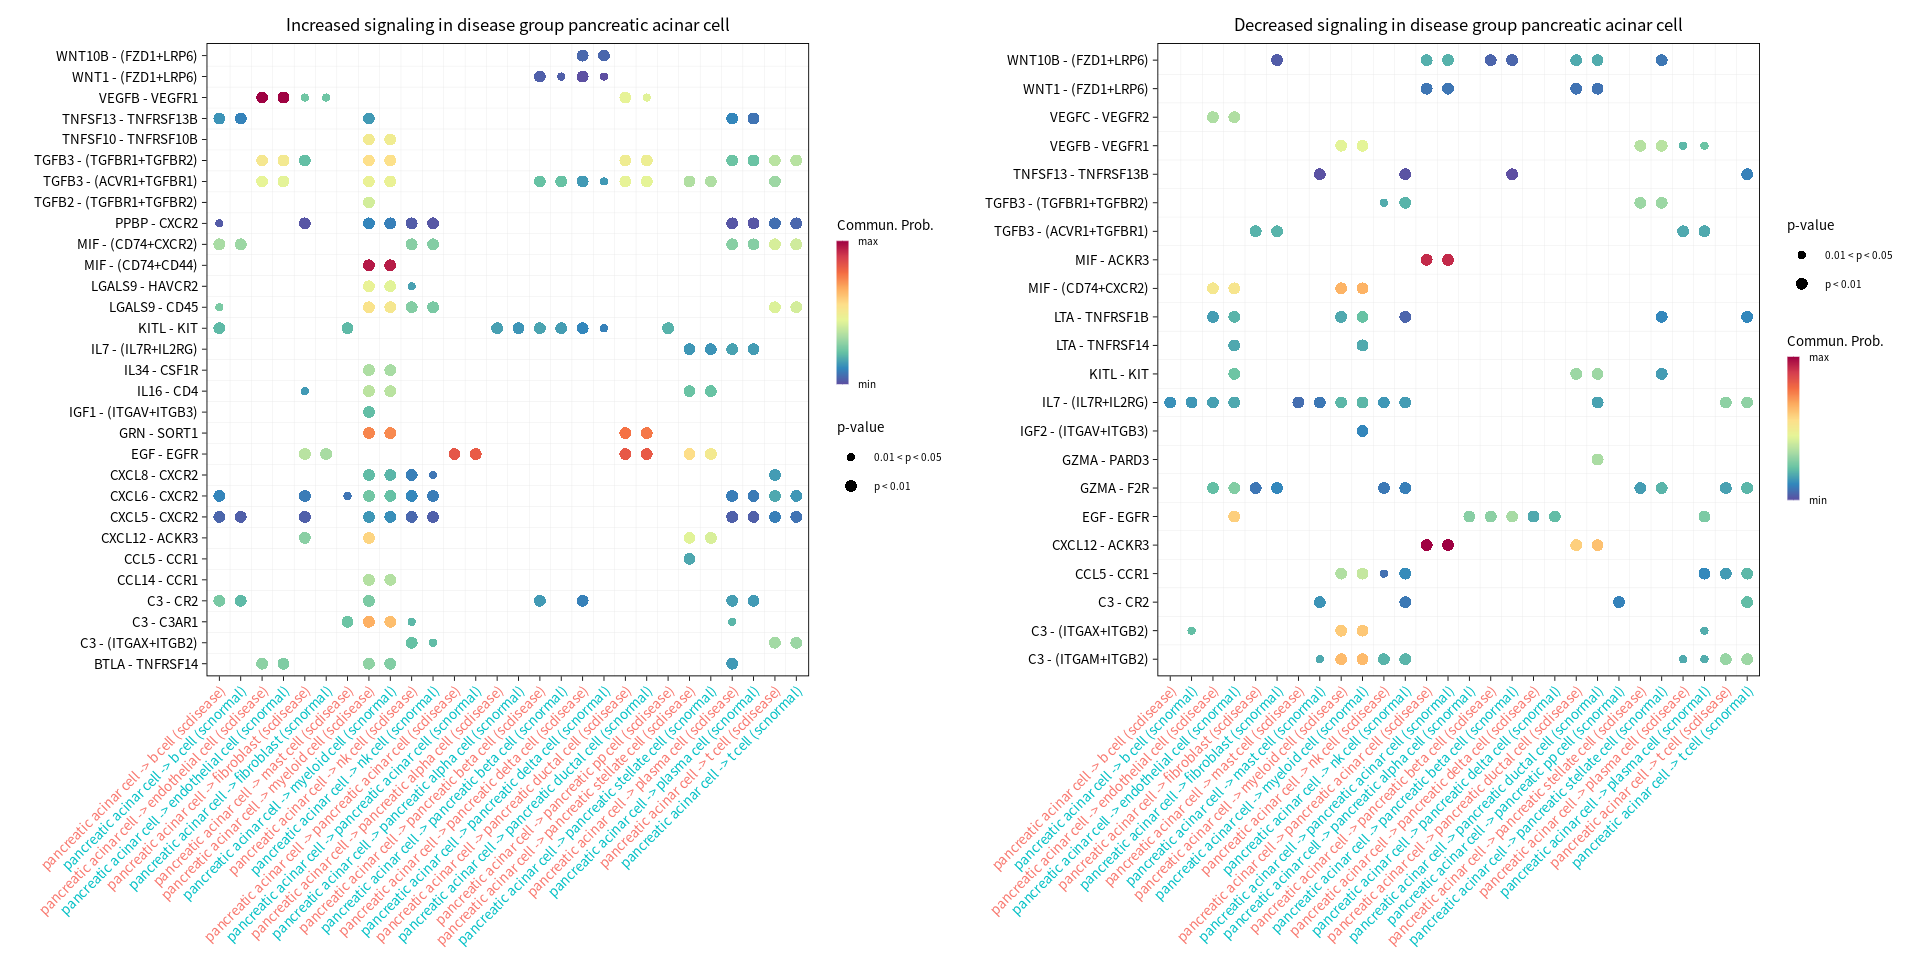

Comparing communications on a merged object 


Comparing communications on a merged object 




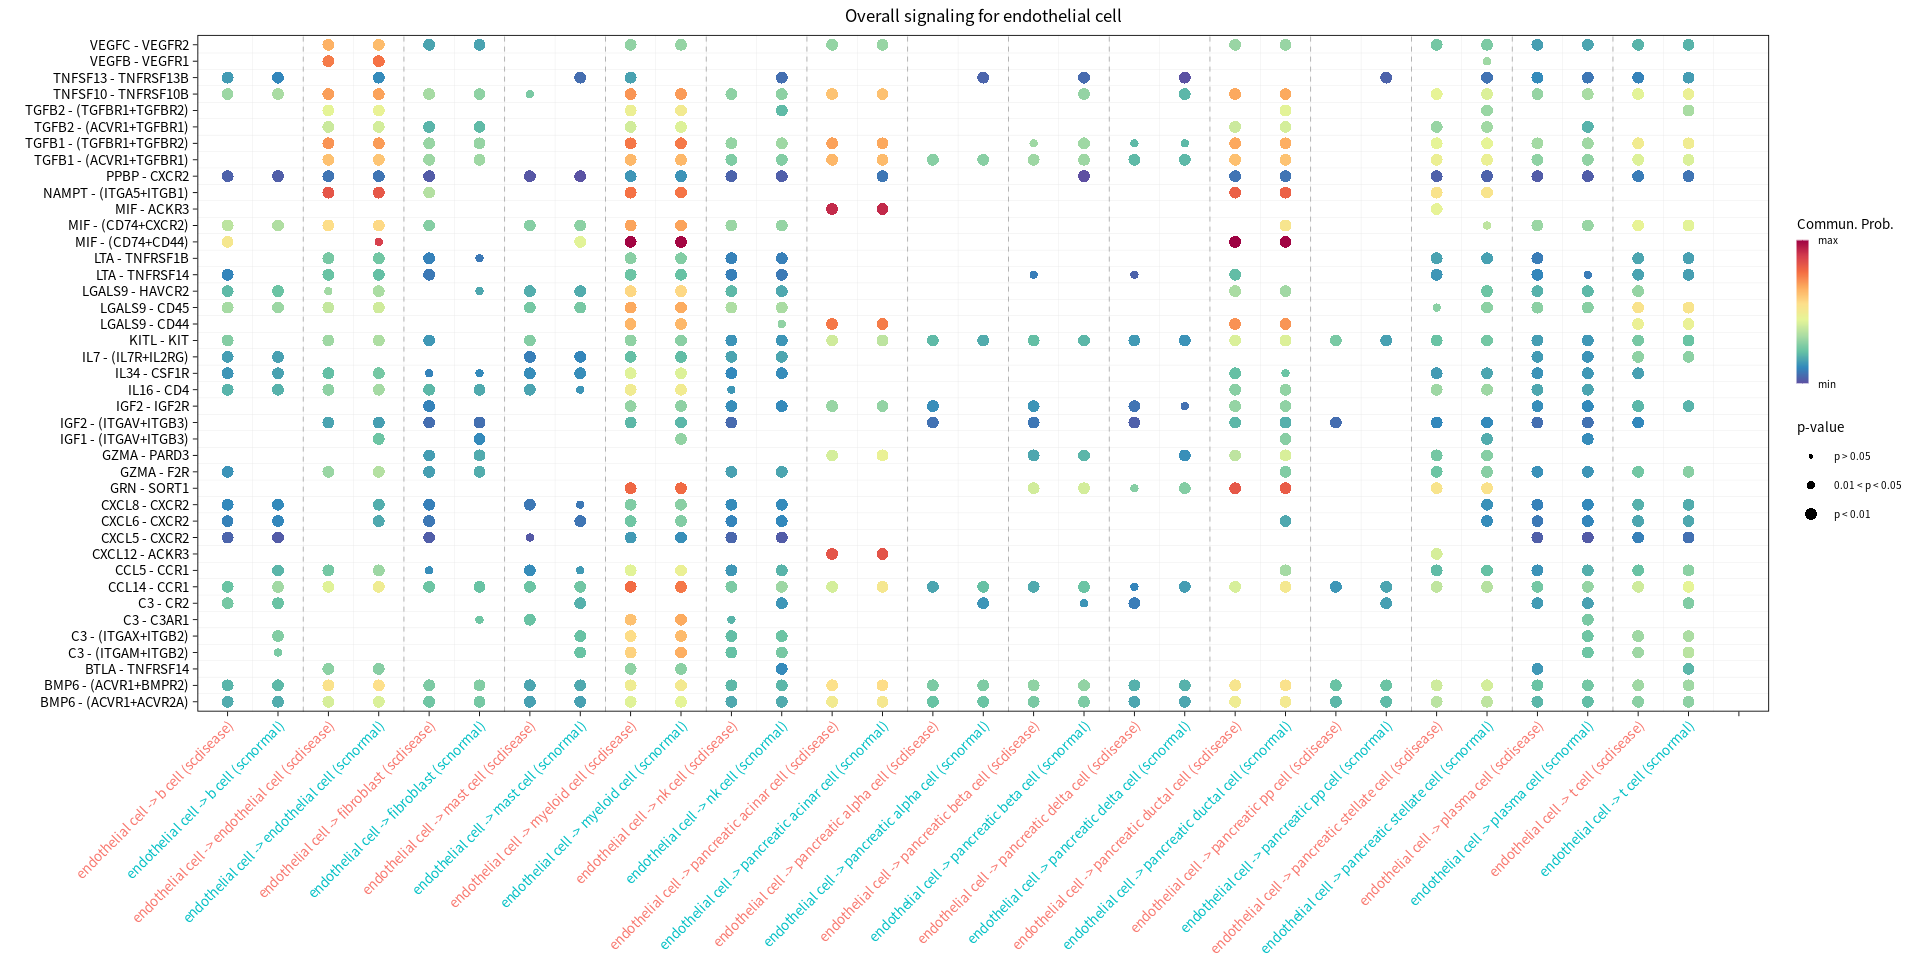

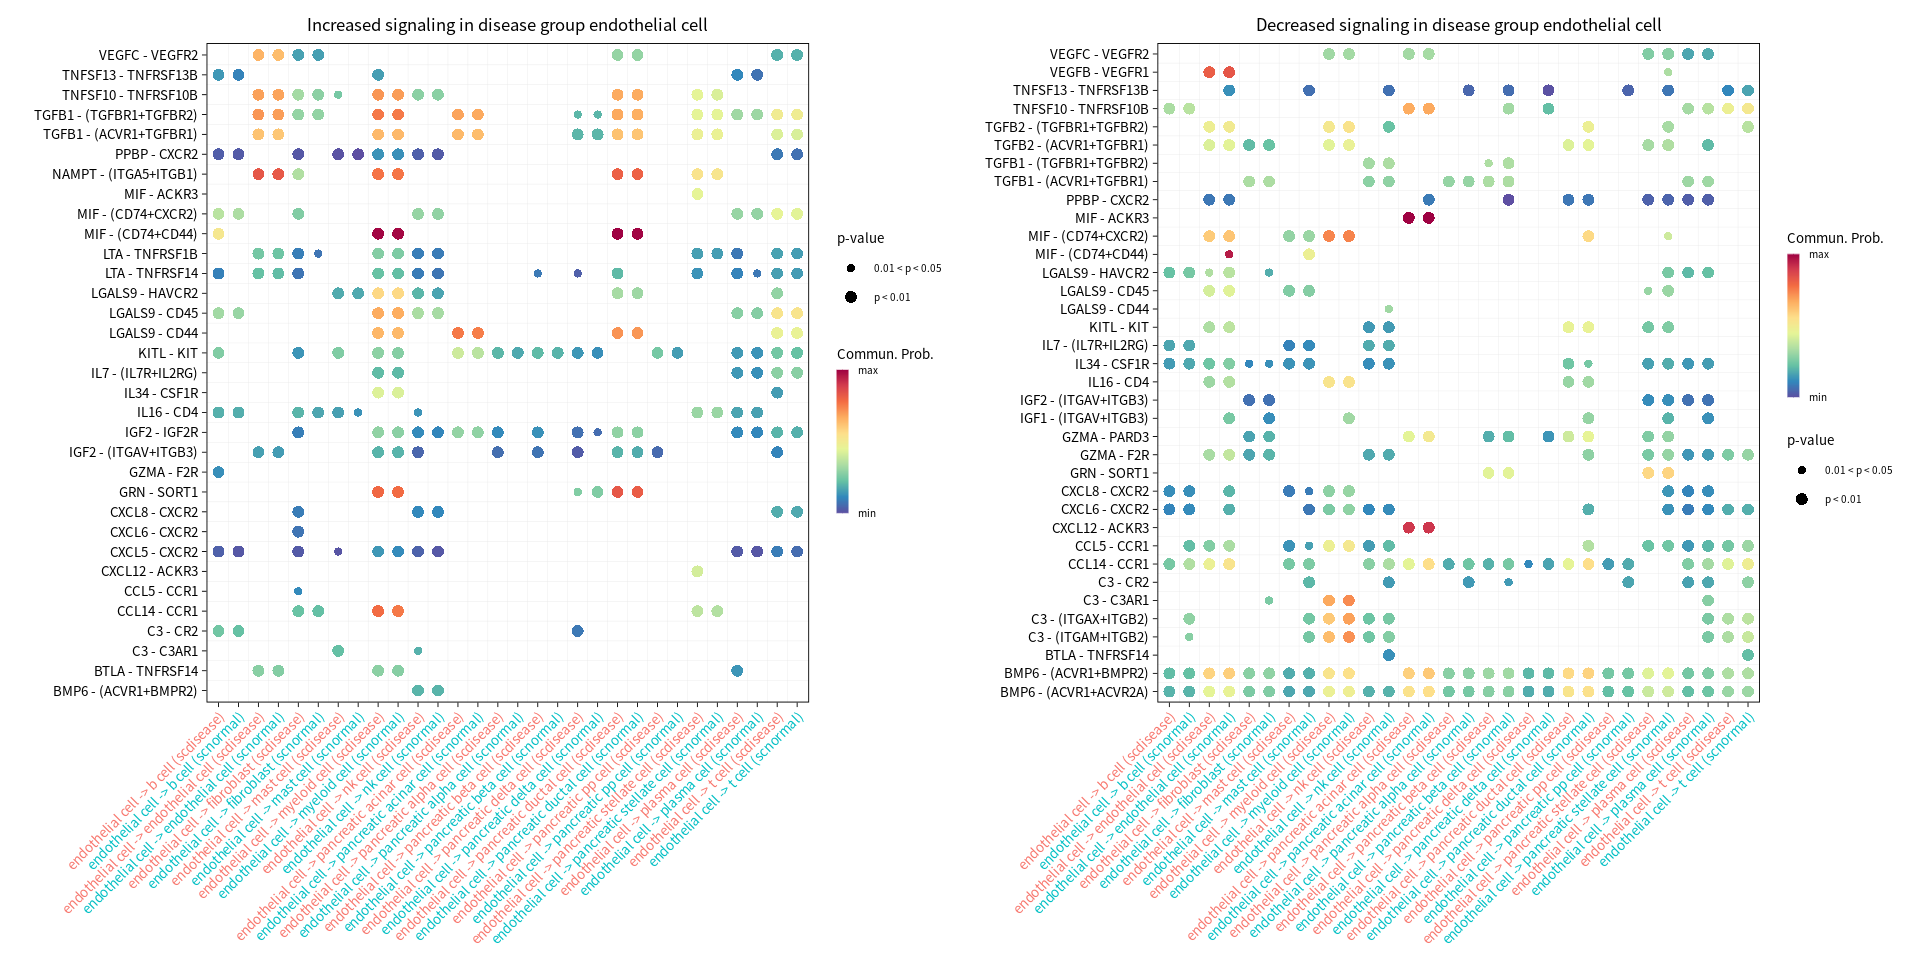

In [14]:
s.cell=c( "myeloid cell", "pancreatic ductal cell", "pancreatic acinar cell", "endothelial cell")

for(cur_cell in s.cell){
  options(repr.plot.width = 16, repr.plot.height = 8)  # 单位是英寸
  print(netVisual_bubble(cellchat, sources.use = cur_cell, targets.use = c(1:20),  comparison = c(1, 2), angle.x = 45, title.name = paste('Overall signaling for', cur_cell, sep=" ")))
  
  gg1 <- netVisual_bubble(cellchat, sources.use = cur_cell, targets.use = c(1:20),  comparison = c(1, 2), max.dataset = 1, title.name = paste("Increased signaling in disease group", cur_cell, sep=" "), angle.x = 45, remove.isolate = T)
  gg2 <- netVisual_bubble(cellchat, sources.use = cur_cell, targets.use = c(1:20),  comparison = c(1, 2), max.dataset = 2, title.name = paste("Decreased signaling in disease group", cur_cell, sep=" "), angle.x = 45, remove.isolate = T)
  print(gg1 + gg2)
  
}

### pathway-level differential analysis

Compute signaling network similarity for datasets 1 2 
Manifold learning of the signaling networks for datasets 1 2 
Classification learning of the signaling networks for datasets 1 2 
2D visualization of signaling networks from datasets 1 2 
Compute the distance of signaling networks between datasets 1 2 


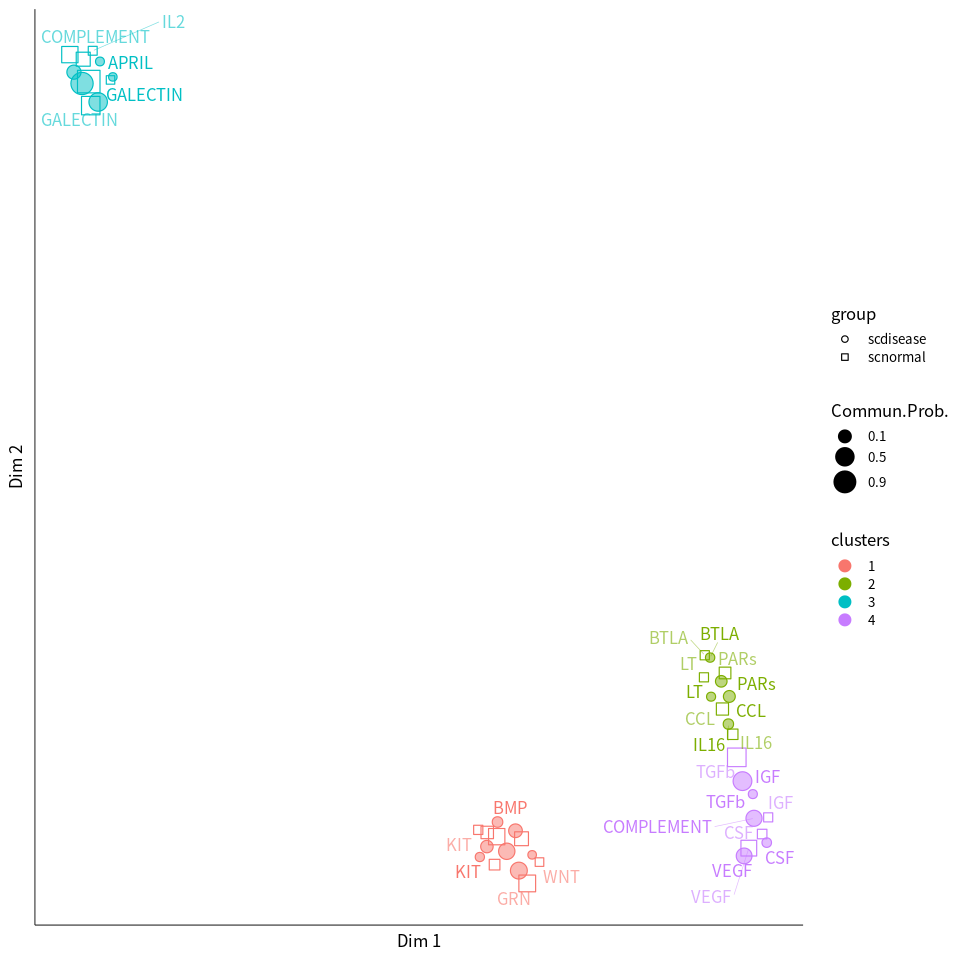

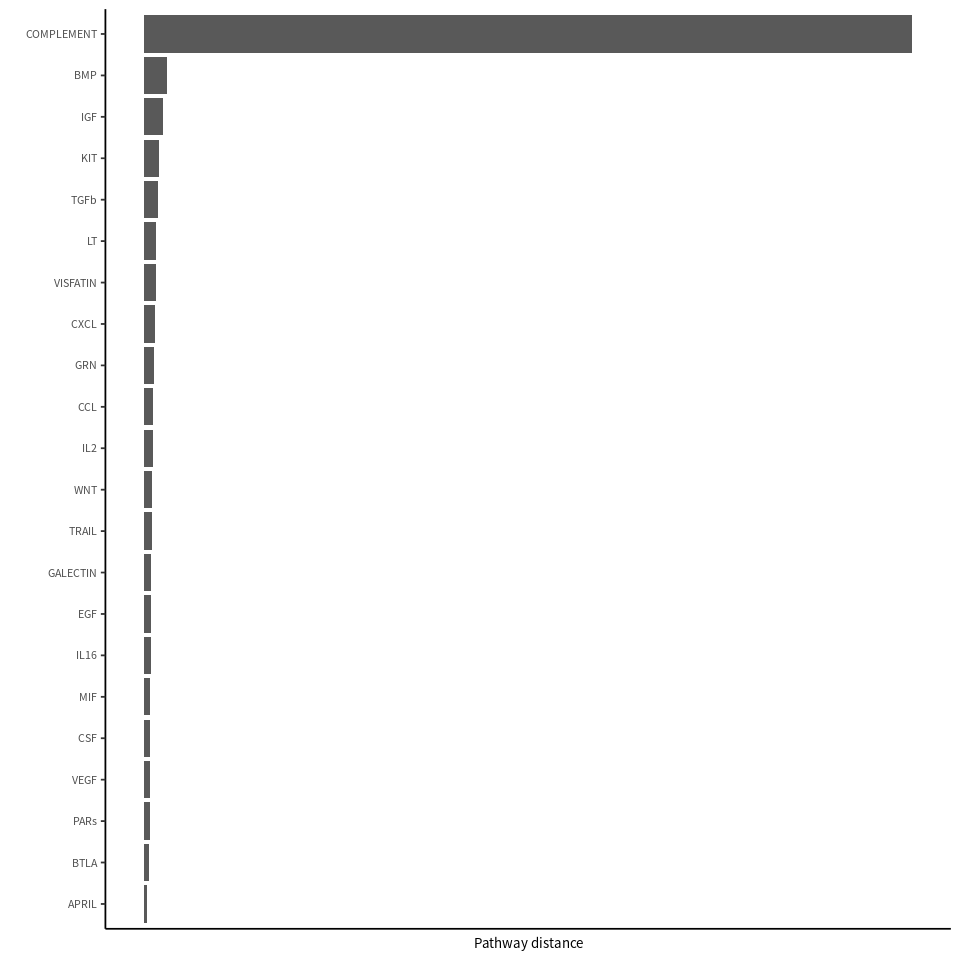

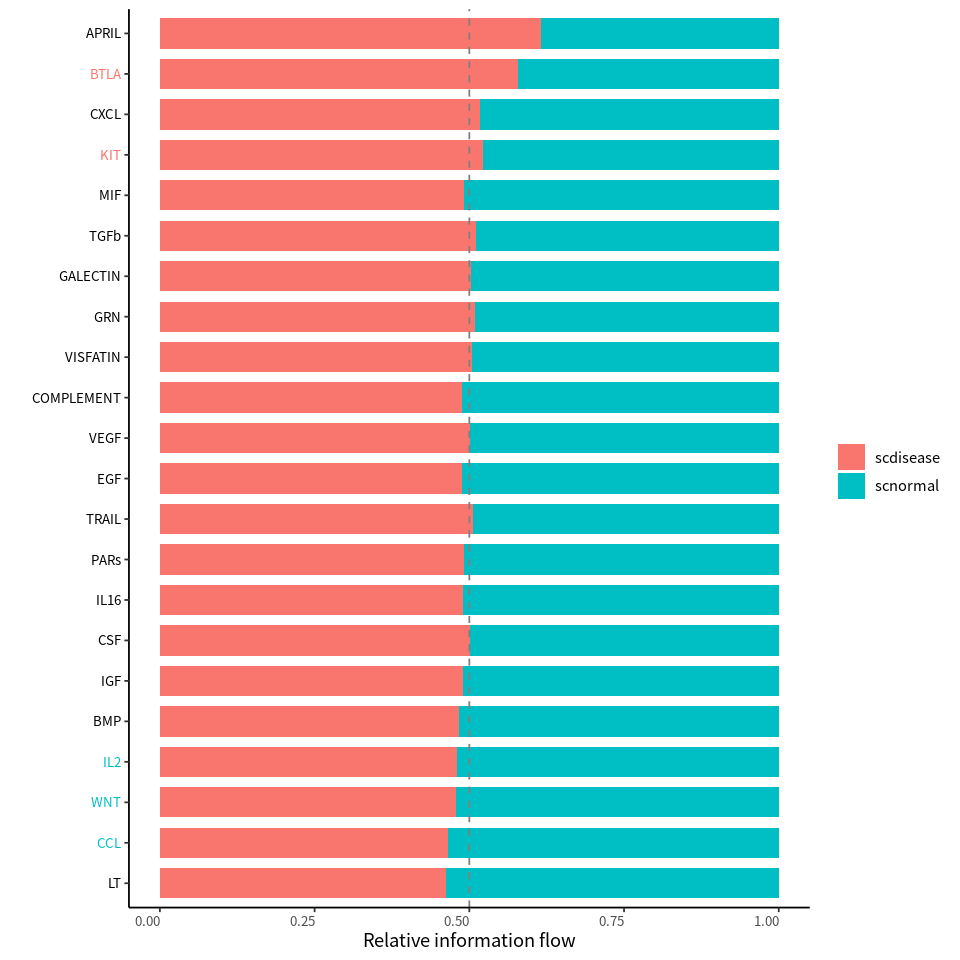

In [15]:
cellchat.pathway <- computeNetSimilarityPairwise(cellchat, type = 'functional')
cellchat.pathway <- netEmbedding(cellchat.pathway, type = 'functional')
cellchat.pathway <- netClustering(cellchat.pathway, type = 'functional', do.parallel = F)

options(repr.plot.width = 8, repr.plot.height = 8)
netVisual_embeddingPairwise(cellchat.pathway, type = 'functional', label.size = 3.5)

rankSimilarity(cellchat.pathway, type = 'functional')

rankNet(cellchat,mode = "comparison",stacked = T,do.stat = T)